In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10,5)

In [ ]:
data = pd.read_csv(r"C:\Users\subha\OneDrive\Desktop\Bengaluru_House_Data.csv")

: 

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [5]:
data.shape

(13320, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


<AxesSubplot:xlabel='area_type', ylabel='count'>

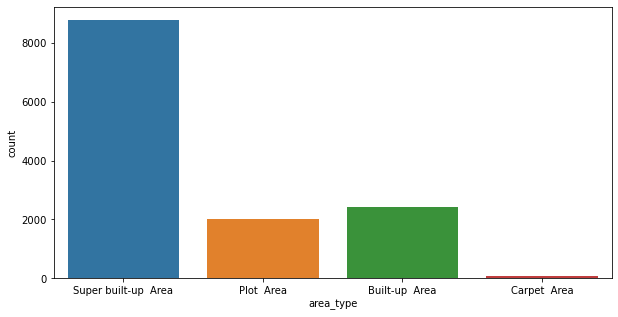

In [7]:
sns.countplot(x="area_type", data = data)

In [8]:
for column in data.columns:
    print(data[column].value_counts())
    print("--"*25)
    print("*"*25)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
--------------------------------------------------
*************************
Ready To Move           10581
18-Dec                    307
18-May                    295
18-Apr                    271
18-Aug                    200
19-Dec                    185
18-Jul                    143
18-Mar                    131
18-Jun                     99
20-Dec                     98
21-Dec                     93
19-Mar                     88
18-Feb                     62
18-Nov                     47
18-Jan                     43
18-Sep                     41
19-Jun                     40
18-Oct                     39
19-Jan                     39
19-Jul                     36
17-Dec                     29
20-Jan                     24
17-Oct                     21
19-Sep                     21
22-Jun                     19
19-Aug                     

In [9]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [10]:
data.duplicated().sum()

529

In [11]:
data.drop(columns=['area_type','availability','society','balcony'],inplace = True)

In [12]:
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [13]:
data.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [15]:
data['location'].value_counts()

Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
LIC Colony                           1
GB Palya                             1
SK Garden                            1
Agara Village                        1
4 Bedroom Farm House in Bagalur      1
Name: location, Length: 1305, dtype: int64

In [16]:
data['location'] = data['location'].fillna('Sarjapur Road')

In [17]:
data['size'] = data['size'].fillna('2 BHK')

In [18]:
data['bath'] = data['bath'].fillna(data['bath'].median())

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [20]:
  data['bhk'] = data['size'].str.split().str.get(0).astype(int)

In [21]:
data[data.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [22]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [23]:
def convertRange(x):
    temp = x.split('-')
    if len(temp) ==  2:
        return (float(temp[0]) + float(temp[1])) / 2
    try:
        return float(x)
    except:
        return None

In [24]:
data['total_sqft'] = data['total_sqft'].apply(convertRange)

In [25]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [26]:
data['price_per_sqft'] = data['price'] * 100000 / data['total_sqft']

In [27]:
data['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [28]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [29]:
data['location'].value_counts()

Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
LIC Colony                           1
GB Palya                             1
SK Garden                            1
Agara Village                        1
4 Bedroom Farm House in Bagalur      1
Name: location, Length: 1306, dtype: int64

In [30]:
data['location'] = data['location'].apply(lambda x : x.strip() )
location_count = data['location'].value_counts()

In [31]:
location_count

Whitefield                         541
Sarjapur  Road                     399
Electronic City                    304
Kanakpura Road                     273
Thanisandra                        237
                                  ... 
GB Palya                             1
SK Garden                            1
Agara Village                        1
IVC Road                             1
4 Bedroom Farm House in Bagalur      1
Name: location, Length: 1295, dtype: int64

In [32]:
location_count_less_10 = location_count[location_count <= 10]
location_count_less_10

Dairy Circle                       10
Gunjur Palya                       10
Ganga Nagar                        10
BTM 1st Stage                      10
Nagadevanahalli                    10
                                   ..
GB Palya                            1
SK Garden                           1
Agara Village                       1
IVC Road                            1
4 Bedroom Farm House in Bagalur     1
Name: location, Length: 1054, dtype: int64

In [33]:
data['location'] = data['location'].apply(lambda x : 'other' if x in location_count_less_10 else x)

In [34]:
data['location'].value_counts()

other                          2886
Whitefield                      541
Sarjapur  Road                  399
Electronic City                 304
Kanakpura Road                  273
Thanisandra                     237
Yelahanka                       213
Uttarahalli                     186
Hebbal                          177
Marathahalli                    175
Raja Rajeshwari Nagar           171
Bannerghatta Road               152
Hennur Road                     152
7th Phase JP Nagar              149
Haralur Road                    142
Electronic City Phase II        132
Rajaji Nagar                    107
Chandapura                      100
Bellandur                        96
KR Puram                         91
Electronics City Phase 1         88
Hoodi                            88
Yeshwanthpur                     85
Begur Road                       84
Sarjapur                         82
Kasavanhalli                     80
Harlur                           79
Banashankari                

In [35]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [36]:
 (data['total_sqft']/data['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [37]:
data = data[((data['total_sqft']/data['bhk']) >= 300)]
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [38]:
data.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
11151,Balagere,2 BHK,1007.0,2.0,68.00,2,6752.730884
4930,other,2 BHK,1135.0,2.0,32.91,2,2899.559471
3503,Sarjapur Road,1 BHK,685.0,1.0,40.00,1,5839.416058
6439,Hosur Road,2 BHK,1345.0,2.0,106.00,2,7881.040892
9201,Kengeri,2 BHK,1220.0,2.0,63.00,2,5163.934426
6087,Electronic City Phase II,2 BHK,1000.0,2.0,28.88,2,2888.000000
3150,Hegde Nagar,3 BHK,1570.0,3.0,105.00,3,6687.898089
2354,Iblur Village,3 BHK,1995.0,3.0,135.00,3,6766.917293
154,Hulimavu,2 BHK,1125.0,2.0,50.00,2,4444.444444
11131,other,3 BHK,1410.0,2.0,54.00,3,3829.787234


In [39]:
data.shape

(12530, 7)

In [40]:
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        
        st = np.std(subdf.price_per_sqft)
        
        gen_df = subdf[(subdf.price_per_sqft  > (m-st) )  & (subdf.price_per_sqft  <= (m+st) )]
        
        df_output = pd.concat([df_output,gen_df],ignore_index = True)
    return df_output
data = remove_outliers_sqft(data)
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,91.286372,2.574896,5659.062876
std,880.694214,0.979449,86.342786,0.897649,2265.774749
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [41]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_states = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_states[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            for bhk, bhk_df in location_df.groupby('bhk'):
                states = bhk_states.get(bhk-1)
                if states and states['count'] > 5:
                    exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (states['mean'])].index.values)
        return df.drop(exclude_indices,axis='index')

In [42]:
data = bhk_outlier_remover(data)

In [43]:
data.shape

(10301, 7)

In [44]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10296,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10297,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10298,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10299,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [45]:
 data.drop(columns = ['size','price_per_sqft'],inplace= True)

In [46]:
data.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [47]:
data.to_csv("Cleaned_data.csv")

In [56]:
X = data.drop(columns=['price'])

In [57]:
y = data['price']

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [60]:
print(X_train.shape)
print(X_test.shape)

(8240, 4)
(2061, 4)


In [62]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False), ['location']), remainder = 'passthrough')

In [63]:
scaler = StandardScaler()

In [64]:
lr = LinearRegression(normalize = True)

In [65]:
pipe = make_pipeline(column_trans, scaler, lr)

In [66]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [67]:
y_pred_lr = pipe.predict(X_test)

In [71]:
r2_score(y_test, y_pred_lr)

0.8282083569673725

In [72]:
lasso = Lasso()

In [73]:
pipe = make_pipeline(column_trans,scaler, lasso)

In [74]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [75]:
y_pred_lasso = pipe.predict(X_test)
r2_score(y_test, y_pred_lasso)

0.821316543187225

In [76]:
ridge = Ridge()

In [77]:
pipe = make_pipeline(column_trans, scaler, ridge)

In [78]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [80]:
y_pred_ridge = pipe.predict(X_test)
r2_score(y_test, y_pred_ridge)

0.8284595107915464

In [84]:
print("No Regularization: ", r2_score(y_test, y_pred_lr))
print("Lasso: ", r2_score(y_test, y_pred_lasso))
print("Ridge: ", r2_score(y_test, y_pred_ridge))

No Regularization:  0.8282083569673725
Lasso:  0.8284595107915464
Ridge:  0.8284595107915464


In [85]:
import pickle

In [86]:
pickle.dump(pipe, open('RidgeModel.pkl', 'wb'))